# <center>Проект построения простой модели машинного обучения</center>

Важно, чтобы компании, работающие с кредитными картами, могли распознавать мошеннические операции с кредитными картами, с которых клиенты не взимали плату за товары, которые они не приобрели.

<p>Он содержит только численные переменные ввода, которые являются результатом преобразования PCA. К сожалению, из-за проблем с конфиденциальностью, мы не можем предоставить оригинальные функции и более справочную информацию о данных. Особенности V1, V2, ... V28 являются основными компонентами, полученными с PCA, только функции, которые не были преобразованы с PCA являются "Время" и "Сумма". </p>
<p>Функция "Время" содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. </p>
<p>Функция "Сумма" - это сумма транзакции, эту функцию можно использовать, например, для зависимого от затрат обучения. </p>
<p>Функция 'Класс' является переменной ответа, и она занимает значение 1 в случае мошенничества и 0 в противном случае.</p>

In [9]:
# импортируем библиотеки, которыми будем пользоваться
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import RFE

In [2]:
filename = 'D:/Desktop/homework/daata for mash learning/creditcard.csv'
dataframe = read_csv(filename)
dataframe.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
# размер данных
dataframe.shape

(284807, 31)

<p>284807 - кол-во строк</p> 
<p>31 - кол-во столбцов</p>

In [5]:
array = dataframe.values
X = array[:,0:30]
Y = array[:,30]

In [10]:
# отбор признаков
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

c:\program files\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num Features: 10
Selected Features: [False False False False  True False False False  True  True  True False
 False  True  True False  True False False False False  True  True False
 False False False  True False False]
Feature Ranking: [21 11 12 16  1  6  9 13  1  1  1 17 15  1  1  8  1 18 19 10  3  1  1  2
  5  7 14  1  4 20]


In [14]:
dataframe = dataframe.drop(['Time', 'V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V11', 'V12', 'V15', 'V17', 'V18', 'V19', 'V20', 
                            'V23', 'V24', 'V25', 'V26', 'V28', 'Amount'], axis=1)

In [15]:
dataframe.head()

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
0,1.378155,0.098698,0.363787,0.090794,-0.991390,-0.311169,-0.470401,-0.018307,0.277838,0.133558,0
1,0.448154,0.085102,-0.255425,-0.166974,0.489095,-0.143772,0.463917,-0.225775,-0.638672,-0.008983,0
2,0.379780,0.247676,-1.514654,0.207643,0.717293,-0.165946,-2.890083,0.247998,0.771679,-0.055353,0
3,-0.863291,0.377436,-1.387024,-0.054952,0.507757,-0.287924,-1.059647,-0.108300,0.005274,0.062723,0
4,0.403034,-0.270533,0.817739,0.753074,1.345852,-1.119670,-0.451449,-0.009431,0.798278,0.219422,0


In [16]:
# статистические характеристики
dataframe.describe()

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,2.074095e-15,1.213481e-16,-2.406331e-15,2.239053e-15,8.190001e-16,1.207294e-15,1.437716e-15,1.654067e-16,-3.568593e-16,-3.660091e-16,0.001727
std,1.415869e+00,1.194353e+00,1.098632e+00,1.088850e+00,9.952742e-01,9.585956e-01,8.762529e-01,7.345240e-01,7.257016e-01,4.036325e-01,0.041527
min,-5.683171e+00,-7.321672e+01,-1.343407e+01,-2.458826e+01,-5.791881e+00,-1.921433e+01,-1.412985e+01,-3.483038e+01,-1.093314e+01,-2.256568e+01,0.000000
25%,-8.486401e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-6.485393e-01,-4.255740e-01,-4.680368e-01,-2.283949e-01,-5.423504e-01,-7.083953e-02,0.000000
50%,-1.984653e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-1.356806e-02,5.060132e-02,6.641332e-02,-2.945017e-02,6.781943e-03,1.342146e-03,0.000000
75%,7.433413e-01,3.273459e-01,5.971390e-01,4.539234e-01,6.625050e-01,4.931498e-01,5.232963e-01,1.863772e-01,5.285536e-01,9.104512e-02,0.000000
max,1.687534e+01,2.000721e+01,1.559499e+01,2.374514e+01,7.126883e+00,1.052677e+01,1.731511e+01,2.720284e+01,1.050309e+01,3.161220e+01,1.000000


In [17]:
# распределение классов
dataframe.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

из всех 284807 операций было совершено 492 мошеннических манипуляции

In [35]:
df_zero = dataframe[(dataframe['Class']==0)]
df_zero = df_zero.sample(frac = 1)
df_zero[0:283315]

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
243139,-1.347856,-0.573961,0.494758,0.339727,0.911912,-1.917920,0.265659,-0.555376,-1.043990,-1.029704,0
10244,0.255568,-0.088491,1.606317,-0.597765,2.167740,1.470102,0.197923,-0.306277,-0.617504,-0.072040,0
89098,3.546743,0.047231,-1.566239,1.181892,0.851225,0.130097,-0.499095,-0.060996,1.059372,0.344176,0
256887,-0.930157,-0.494491,-1.244041,0.823726,-1.884817,0.360155,0.115748,0.211310,0.764198,-0.333061,0
175388,-2.389229,0.069069,-0.485954,-0.170970,-2.021753,0.483163,-1.416107,-0.170825,-0.230818,0.088156,0
...,...,...,...,...,...,...,...,...,...,...,...
90721,0.408608,-0.451995,-0.621714,-0.254710,1.467687,-0.823918,-0.054816,-0.190295,-0.386765,-0.190889,0
34935,-0.473817,0.258019,-0.475846,-0.911507,0.270635,-0.137179,-0.150382,-0.125690,-0.410682,-0.012351,0
242384,-1.314217,-0.399855,1.878183,3.057928,-0.634207,-0.779123,-0.184546,-0.715974,-0.610028,-0.144707,0
142930,-0.688775,0.021739,-0.542705,0.537194,1.226103,-0.606261,1.142522,0.419215,1.248303,0.060276,0


In [39]:
fd = dataframe
fd = fd.drop(df_zero[0:283315].index, axis=0)

In [40]:
fd

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
415,0.530004,-0.751563,0.012713,1.619208,0.156190,-0.152586,-0.571061,-0.046722,0.720870,0.157919,0
541,3.997906,1.391657,-2.770089,-2.772272,-0.595222,-4.289254,-1.140747,0.517232,-0.035049,0.261145,1
623,2.288644,-0.067794,-0.270953,-0.838587,0.676502,-1.692029,0.666780,0.661696,0.435477,-0.252773,1
873,-1.825017,-0.016472,0.874949,-0.946679,1.275058,0.256340,-0.345359,-0.018026,0.108383,0.016958,0
980,-2.207912,0.050055,2.470382,-1.728971,0.801418,-0.360064,-1.118987,0.065871,0.610271,0.111789,0
...,...,...,...,...,...,...,...,...,...,...,...
282073,0.229266,-0.272101,0.561686,0.059481,0.393879,0.195855,0.048896,-0.330389,-0.799826,-0.067473,0
282963,-0.851836,0.322575,-0.458774,-1.438330,0.994392,-0.041231,0.388793,-0.117750,-0.597612,-0.148885,0
283431,-0.592716,-0.169644,-0.013520,-0.412392,-0.207230,0.159999,-0.142006,-0.258366,-0.564759,0.249635,0
284336,-0.383481,0.625517,0.467192,-1.147013,-1.095029,-0.684090,0.951819,-0.118363,-0.419061,-0.049761,0


In [41]:
fd.groupby('Class').size()

Class
0    1000
1     492
dtype: int64

In [42]:
dataframe = fd

## Визуализация

### Одномерные графики

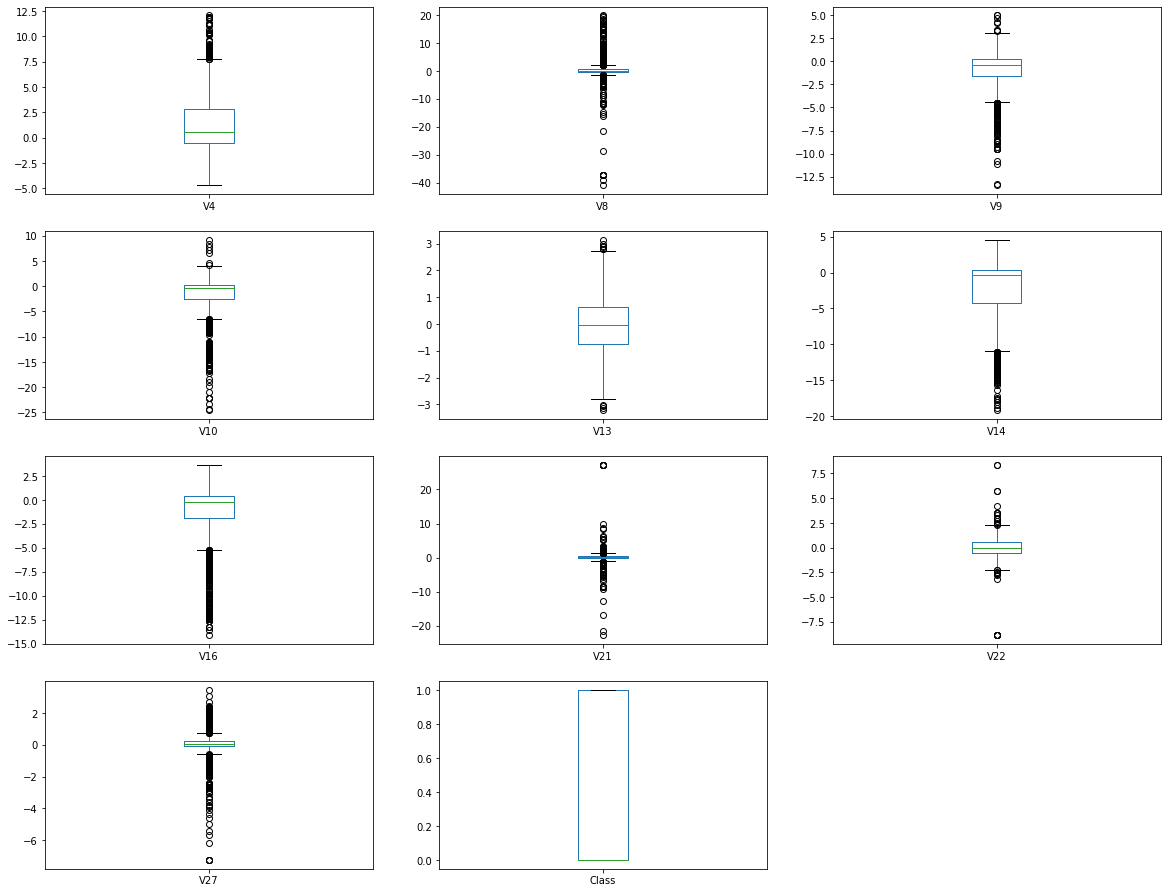

In [44]:
# ящик с усами
dataframe.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False, figsize=(20,20))
pyplot.show()

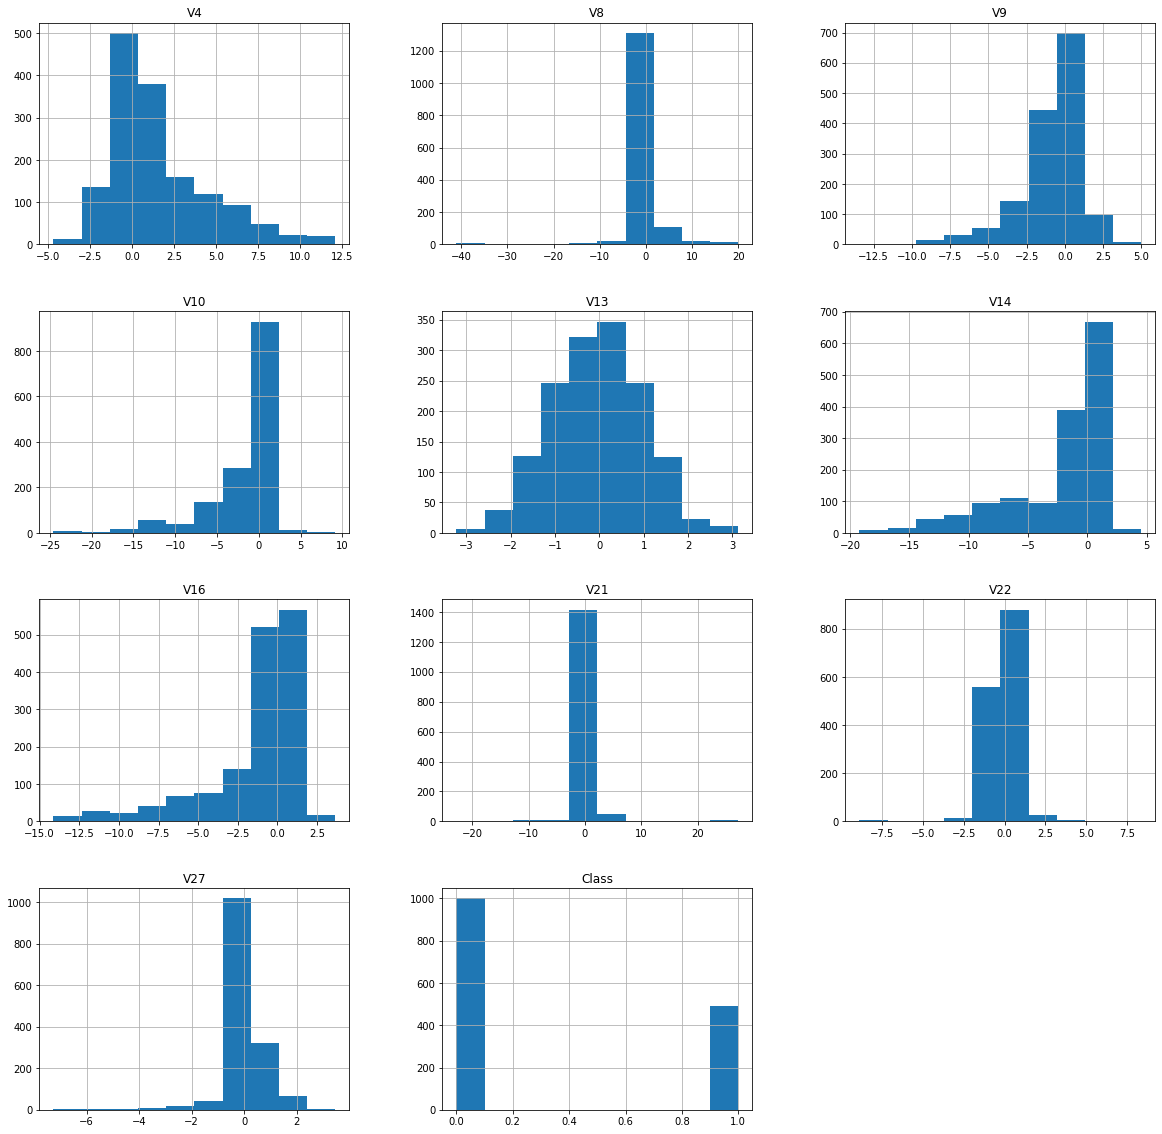

In [45]:
# гистограмма
dataframe.hist(figsize=(20,20))
pyplot.show()

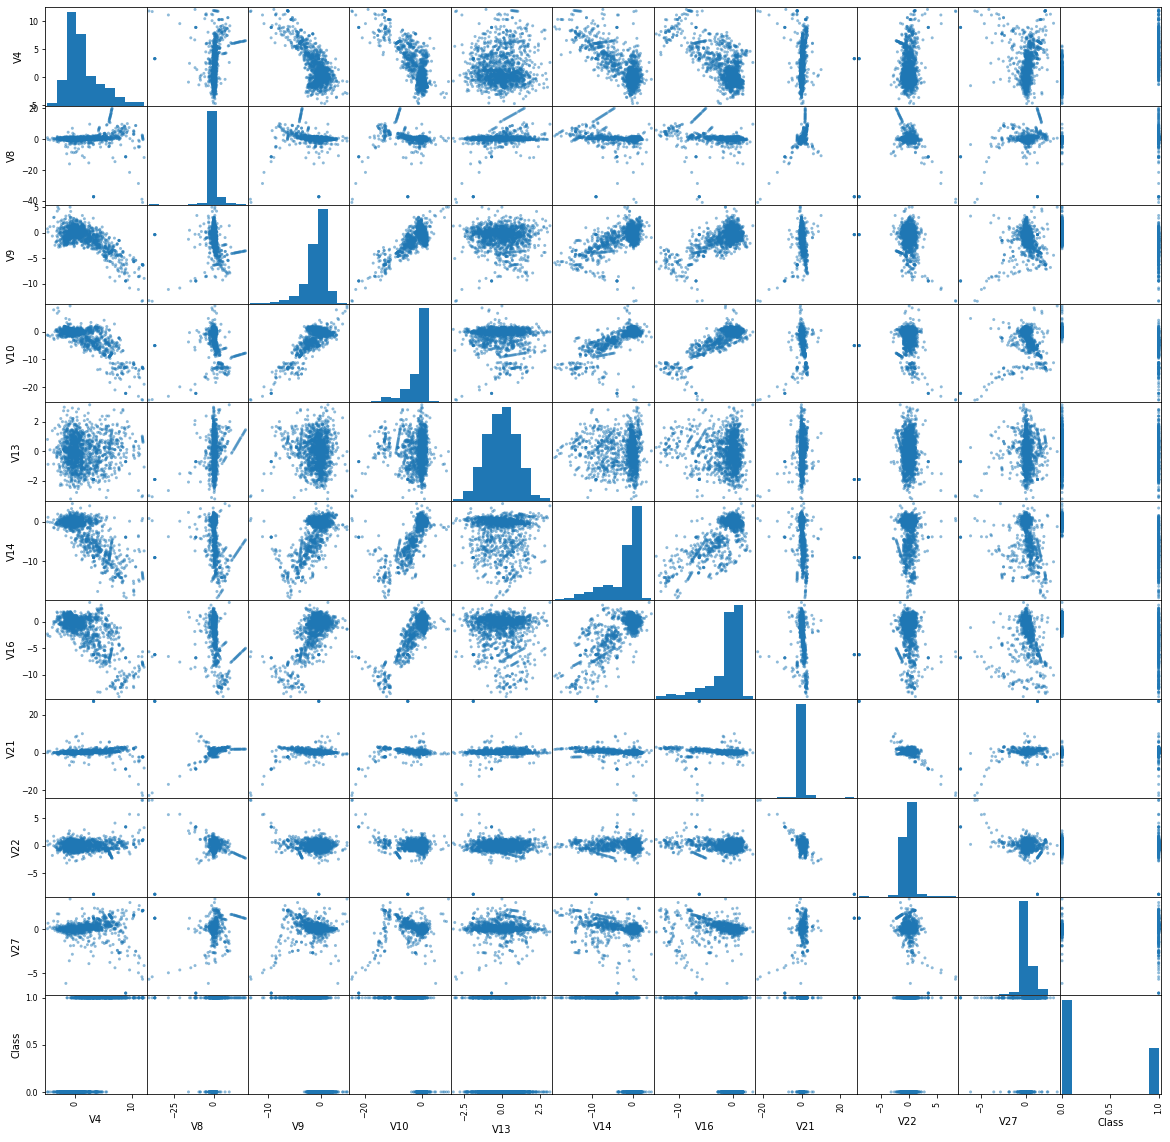

In [46]:
# диаграмма рассеяния
scatter_matrix(dataframe, figsize=(20,20))
pyplot.show()

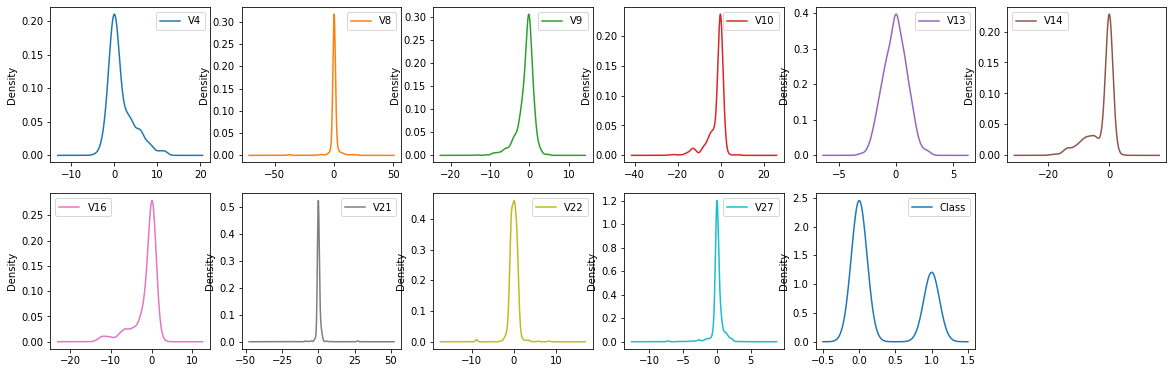

In [47]:
# ядерная оценка плотности
dataframe.plot(kind = 'density', subplots = True, layout = (6,6), sharex = False, figsize=(20,20))
pyplot.show()

## Алгоритмы классификации

In [49]:
array = dataframe.values
X = array[:,0:10]
Y = array[:,10]

In [50]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) # логистическая регрессия
models.append(('LDA', LinearDiscriminantAnalysis())) # дискрименантный анализ
models.append(('KNN', KNeighborsClassifier())) # к-ближайших соседей
models.append(('CART', DecisionTreeClassifier())) # деревья классификации
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [51]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [52]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.953074 (0.009991)
LDA: 0.922899 (0.022967)
KNN: 0.957092 (0.012819)
CART: 0.928949 (0.017312)
NB: 0.935642 (0.019303)
SVM: 0.951056 (0.012073)


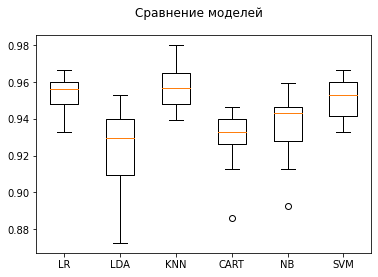

In [53]:
# построим ящик с усами
fig = pyplot.figure()
fig.suptitle('Сравнение моделей') # название
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

чем выше точность, тем лучше => лучшая модель kNN (оранжевая полоска высокая)

## Предсказание

In [54]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size, random_state=seed)

In [55]:
kNN = KNeighborsClassifier()
kNN.fit(X_train, Y_train)
predictions = kNN.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9614604462474645
[[317   4]
 [ 15 157]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       321
         1.0       0.98      0.91      0.94       172

    accuracy                           0.96       493
   macro avg       0.96      0.95      0.96       493
weighted avg       0.96      0.96      0.96       493

